# Modelagem e migração sísmica em meios atenuantes
### SENAI CIMATEC
### Autor : Peterson Nogueira

# Atenuação

<p style="line-height: 1.5;">


 - Engloba os efeitos de dissipação de energia (dimininuição de amplitude) e dispersão da velocidade de fase da onda;
 - Efeitos anelásticos do meio, os quais são descritos pelo fator de qualidade $Q$;
 - A compensação dos efeitos da atenuação é necessária para obtermos uma melhor imagem da subsuperfície.


<img src='./atenuacao.png' width=400>

</p>

## Como compensar o efeito da atenuação para obtermos uma boa imagem sísmica da subsuperfície?

### Domínio do dado

<img src='./filtro_comp.png' width=500>

- Filtros de compensação
- Pouco efetivo
- Não é o objetivo deste curso

### Equação de onda --> Imageamento 

<img src='./snaps.png' width=500>

- Melhor solução, contudo mais laborioso e mais custoso computacionalmente



## Modelos Matemáticos (Reológicos) de atenuação

### Modelo de Maxwell
   - Uma dada tensão $\sigma$ aplicada ao modelo produz uma deformação $\epsilon_{1}$ na mola e uma deformação $\epsilon_{2}$ no cilindro (dashpot).
   
   <img src='./maxwell.png' width=200>
 
 - Mesma tensão $\sigma$
 - Diferentes deformações $\epsilon_{1}$ e $\epsilon_{2}$
   
   
### Modelo de Kelvin-Voigt
   - O modelo físico Kelvin-Voigt consiste de uma mola e um dashpot conectado em paralelo:
   
   <img src='./kv.png' width=200>
   
 - Mesma deformação $\epsilon$
 - Diferentes tensões $\sigma_{1}$ e $\sigma_{2}$
 
### Modelo Sólido Linear Padrão
   - Uma combinação de um elemento Kelvin-Voigt com uma mola:
   
   <img src='./sls.png' width=200>
   
   - Modelo mais complexo e completo

## Modelagem sísmica numérica




<img src='./modelagem_sismica.png' width=500>

- Simulação da propagação das ondas sísmicas na subsuperfície:

#### Componentes para realizar uma modelagem sísmica numérica:

<p style="line-height: 2.5;">

- **Fonte** - Uma fonte é posicionada em uma ou poucas localizações físicas, onde uma pressão artificial é injetada no domínio que queremos modelar. No caso de uma pesquisa terrestre, geralmente é dinamite detonando em uma localização específica, ou um vibroseis (um motor vibratório que gera ondas sonoras contínuas). Para uma pesquisa marinha, a fonte é uma pistola de ar (air gun) que emite uma bolha de ar comprimido na água, que se expandirá e gerará uma onda sísmica.
- **Receptor** - Um conjunto de microfones ou hidrofones é usado para medir a onda resultante e criar um conjunto de medições chamado Sismograma. Essas medições são registradas em várias localizações, geralmente na superfície do domínio ou no fundo do oceano em alguns casos marinhos.
- **Modelo matemático** - Equação da onda
- **Condiçoes de contorno** - Bordas absorventes

</p>


## Equação da Onda Acústica

<p style="line-height: 1.5;">
    
A propagação do sinal sísmico pode ser entendida considerando-se um meio puramente acústico, no qual não se propagam ondas tranversais. Neste caso a equação da onda é uma equação escalar, que prevê apenas a propagação de ondas longitudinais (ondas P).

\begin{equation}
\frac{1}{v^2}\frac{\partial^2 P}{\partial{t^2}} - \nabla^{2}P = f \tag{1}
\label{EQA}
\end{equation}

sendo $P = P(x, z, t)$ o campo de pressão, $v = v(x,z)$ a velocidade do meio e $f=f(x, z, t)$ o termo fonte.

\begin{equation}
\nabla^{2} = \frac{\partial^2}{\partial{x^2}} + \frac{\partial^2}{\partial{z^2}}
\end{equation}

É o operador Laplaciano em coordenadas cartesianas

- A equação da onda desempenha um papel importante no entendimento de vários fenômenos físicos; 
- Lei que governa o avanço do campo de pressão no tempo e no espaço;
- Equação diferencial parcial de segunda ordem;
- Sua solução desta equação deve ser vista como uma forma de explicitar o avanço do campo de pressão, a partir das medidas feitas em uma dada posição.

### Solução numérica por diferenças finitas

A derivada parcial da função $P=P(x, y, z, t)$ em relação a $x$, considerando que as variáveis $x, y, z$ e $t$ são independentes, é definida como:
    
    

\begin{equation}
\frac{\partial P}{\partial{x}} = \frac{P(x+\Delta{x}, y, z, t) - P(x, y,z, t)}{\Delta{x}} \tag{2}
\end{equation}

O mesmo tipo de desenvolvimento pode ser utilizado para as derivadas parciais da função $P = P (x, y, z, t)$ em relação as variáveis $y, z$ e $t$.

Um aspecto interessante na equação (2) é que as variáveis \(y\) e \(z\) são mantidas constantes quando se calcula a derivada parcial da função \(P\) em relação a \(x\). Isto ocorre porque as variáveis são independentes.

Uma derivada parcial pode ser discretizada através do truncamento da série de Taylor.

A série de Taylor para \(P(x + \Delta x) \) é dada por:

<!-- \begin{quote}
"Omitimis as variáveis \(y\) e \(z\) por motivo de simplificação na notação, mas todo o desenvolvimento matemático feito em relação à variável \(x\) é também válido para as variáveis contidas."
\end{quote} -->

\begin{equation}
P(x + \Delta x) = P(x) + \frac{\partial P(x)}{\partial x} \Delta x + \frac{\partial^2 P(x)}{\partial x^2} \frac{(\Delta x)^2}{2!} + \frac{\partial^3 P(x)}{\partial x^3} \frac{(\Delta x)^3}{3!} + \cdots \tag{3}
\end{equation}

Usando a mesma série para \(P(x - \Delta x)\) tem-se:

\begin{equation}
P(x - \Delta x) = P(x) - \frac{\partial P(x)}{\partial x} \Delta x + \frac{\partial^2 P(x)}{\partial x^2} \frac{(\Delta x)^2}{2!} - \frac{\partial^3 P(x)}{\partial x^3} \frac{(\Delta x)^3}{3!} + \cdots \tag{4}
\end{equation}

Selecionando a equação (3) e desprezando os termos de ordens superiores a um, obtém-se:

\begin{equation}
\frac{\partial P(x)}{\partial x} \approx \frac{P(x + \Delta x) - P(x)}{\Delta x} \tag{5}
\end{equation}

Selecionando agora a equação (4) e desprezando os termos de ordens superiores a um, tem-se:

\begin{equation}
\frac{\partial P(x)}{\partial x} \approx \frac{P(x) - P(x - \Delta x)}{\Delta x} \tag{6}
\end{equation}

Podemos ainda obter outra expressão para derivada primeira. Subtraindo a equação (4) de (3), resulta em:

\begin{equation}
P(x + \Delta x) - P(x - \Delta x) = \frac{2 \partial P(x)}{\partial x} \Delta x + \frac{2 \partial^3 P(x)}{\partial x^3} \frac{(\Delta x)^3}{3!} + \cdots \tag{7}
\end{equation}

e desprezando os termos de ordens superiores a um na equação (7) tem-se:

\begin{equation}
\frac{\partial P(x)}{\partial x} \approx \frac{P(x + \Delta x) - P(x - \Delta x)}{2(\Delta x)} \tag{8}
\end{equation}

Somando agora as equações (3) e (4) obtém-se o seguinte resultado:

\begin{equation}
P(x + \Delta x) + P(x - \Delta x) = 2P(x) + \frac{\partial^2 P(x)}{\partial x^2} \frac{(\Delta x)^2}{2!} + \frac{\partial^4 P(x)}{\partial x^4} \frac{(\Delta x)^4}{4!} + \cdots \tag{8}
\end{equation}

Uma aproximação da derivada segunda de \(P\) em relação a \(x\) no ponto \(x\) pode ser obtida desprezando os termos de ordens superiores a dois na equação (8), ou seja:

\begin{equation}
\frac{\partial^2 P(x)}{\partial x^2} \approx \frac{P(x + \Delta x) - 2P(x) + P(x - \Delta x)}{(\Delta x)^2} \tag{9}
\end{equation}

O resultado obtido para a derivada segunda na equação (9) é conhecido como operador de diferenças finitas de segunda ordem.

</p>

## Condições de contorno


<img src='./domain2.png' width=500>


<p style="line-height: 1.5;">
Este é um parágrafo com espaçamento de linha de 1,5. 
As linhas aqui estarão mais espaçadas.
</p>


# Modelagem Sísmica

<p style="line-height: 2.0;">

 - Aqui faremos o passo a passo de modelagem sísmica com lingugem simbólica utilizando o Devito em um caso simples em 2D. 
 - Vamos criar um modelo físico do nosso domínio e definir uma única fonte e um conjunto correspondente de receptores para realizar a modelagem. Mas, primeiro, inicializamos algumas utilidades básicas:
</p>

In [1]:
import numpy as np
import sympy as sp
from devito import *
import matplotlib.pyplot as plt
%matplotlib inline

## Definindo os parâmetros da modelagem sísmica

<p style="line-height: 2.0;">

O primeiro passo é definir o modelo físico:

- Quais são as dimensões físicas de interesse?
- Quais serão os valores dos parâmetros?

Aqui, inicialmente, criaremos manualmente um modelo de velocidade simples para fins de demonstração. Esse modelo consiste essencialmente em duas camadas, cada uma com uma velocidade diferente: $1,5 \, \text{km/s}$ na camada superior e $2,5 \, \text{km/s}$ na camada inferior. 
</p>   

In [2]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import Model, ModelViscoacoustic, plot_velocity

# Definindo o tamanho do modelo físico
shape = (101, 101)  # Número de pontos da malha (nx, nz)
spacing = (10., 10.)  # Espaçamento, em metros, entre os pontos da malha. 
origin = (0., 0.)  # Localização do canto superior esquerdo?
space_order = 8
nbl = 100


# Definie o modelo de velocidade em km/s
v = np.empty(shape, dtype=np.float32)
v[:, :51] = 1.5
v[:, 51:] = 2.5


qp = np.zeros(shape)
qp[:] = 3.516*((v[:]*1000.)**2.2)*10**(-6) # Fórmula empírica de Li

rho = np.zeros(shape)
rho[:] = 0.31*(v[:]*1000.)**0.25 # Gardner's relation


model = ModelViscoacoustic(space_order=space_order, vp=v, qp=qp, b=1/rho,   
                           origin=origin, shape=shape, spacing=spacing, 
                           nbl=nbl)

Operator `initdamp` ran in 0.01 s


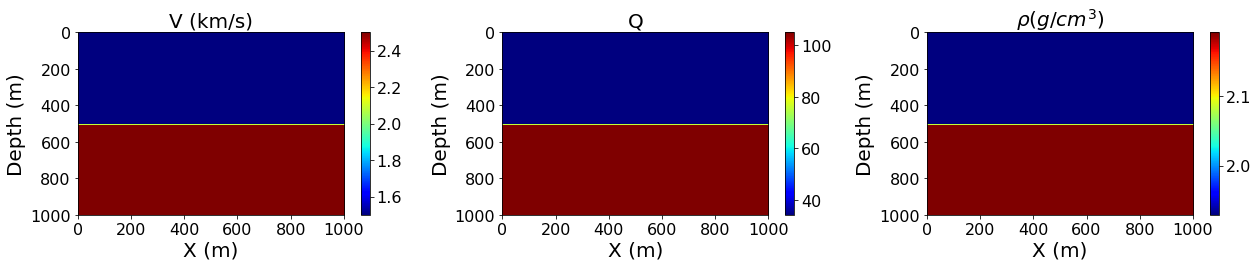

In [3]:
from utils import V_Q_plot

V_Q_plot(model)

# Geometria de aquisição

Para definir completamente a configuração do nosso problema, também precisamos definir a fonte que injeta a onda no modelo e o conjunto de locais de recepção onde amostraremos o campo de onda. A assinatura temporal da fonte será modelada usando um wavelet de Ricker definido como

\begin{equation}
  f(t) = (1-2\pi^2 f_0^2 (t - \frac{1}{f_0})^2 )e^{- \pi^2 f_0^2 (t - \frac{1}{f_0})}
\end{equation}

Para definir completamente a assinatura da fonte, primeiro precisamos definir a duração do tempo $t_{n}$ para nosso modelo e o tamanho do intervalo de tempo $dt$.

In [4]:
from examples.seismic import TimeAxis

t0 = 0.  # Simulação começa em t=0
tn = 1000.  # Duração da simulação em milisegundos 
dt = model.critical_dt  # passo no tempo 

time_range = TimeAxis(start=t0, stop=tn, step=dt)

#### A fonte será posicionada a uma profundidade de $20m$ e no meio do eixo $x$ ($x_{src}=500m$), com uma frequência de pico do wavelet de $20Hz$.

In [5]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import RickerSource

f0 = 0.020  # Frequência de pico da wavelet em kHz
src = RickerSource(name='src', grid=model.grid, f0=f0, npoint=1, time_range=time_range)

# Primeiro, posicionareoms a fonte centralmente e, em seguida, definiremos a profundidade.
src.coordinates.data[0, :] = np.array(model.domain_size) * .5
src.coordinates.data[0, -1] = 20.  # Profundidade em 20m

### Podemos plotar a assinatura temporal para ver o wavelet:


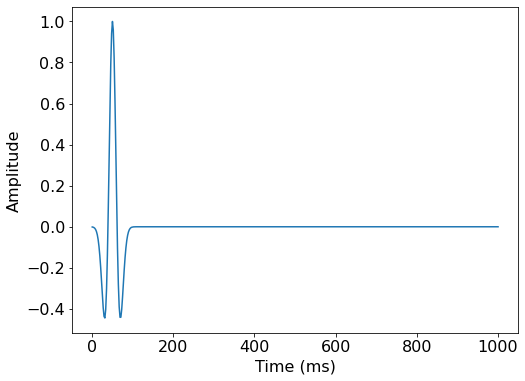

In [6]:
src.show()

## Receptores:

<p style="line-height: 1.5;">

- Agora podemos definir nossa geometria de receptores como um símbolo do tipo `Receiver`.
    
- Vale ressaltar que:
    
  - `RickerSource` e `Receiver`, são `SparseTimeFunction` do Devito.
    
    
  - O `SparseTimeFunction` encapsula dados pontuais esparsos e permite injetar e interpolar valores para dentro e para fora da grade computacional.
    
    
- Ambas as classes fornecem uma propriedade `.coordinates` para definir a posição dentro do domínio de todos os pontos encapsulados por esse símbolo.
    
    
- Posicionaremos os receptores na mesma profundidade que a fonte, a cada $10m$ ao longo do eixo $x$.
    
    
- A propriedade `rec.data` será inicializada, mas deixada vazia, pois calcularemos as leituras dos receptores durante a simulação.
    
</p>

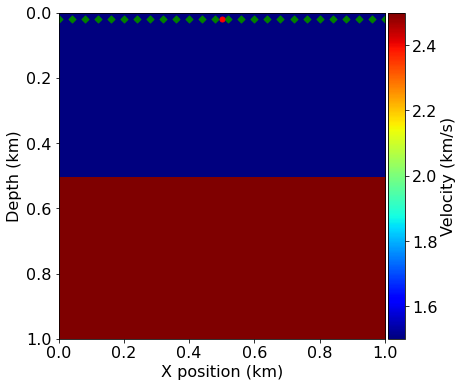

In [7]:
from examples.seismic import Receiver

rec = Receiver(name='rec', grid=model.grid, npoint=shape[0], time_range=time_range)

rec.coordinates.data[:, 0] = np.linspace(0, model.domain_size[0], num=shape[0])
rec.coordinates.data[:, 1] = 20.  # Profundidade 20m

# Agora podemos mostrar a fonte e os receptores dentro do nosso domínio:
# Ponto vermelho: Localização da fonte
# Pontos verdes: Localizações dos receptores (a cada 4 pontos)

plot_velocity(model, source=src.coordinates.data,
              receiver=rec.coordinates.data[::4, :])

## Implementação a equação da onda:

### Acústica


\begin{equation}
\frac{1}{v^2}\frac{\partial^2 P}{\partial{t^2}} - \rho \nabla \cdot \frac{1}{\rho}\nabla{P}= f 
\end{equation}


### Visco-acústica
Equações que levam em consideração os efeitos atenuantes na propagação da onda
### Maxwell 


\begin{equation}
\frac{1}{v^2}\frac{\partial^2 P}{\partial{t^2}} - \rho \nabla \cdot \frac{1}{\rho}\nabla{P} + \frac{1}{v^2} \frac{\omega}{Q}\frac{\partial{P}}{\partial{t}} = f 
\end{equation}


### Kelvin Voigt


\begin{equation}
\frac{1}{v^2}\frac{\partial^2 P}{\partial{t^2}} - \rho \nabla \cdot \frac{1}{\rho}\nabla{P} + \frac{v^2 \rho}{\omega Q}\nabla \cdot \frac{1}{\rho}\nabla{\frac{\partial{P}}{\partial{t}}} = f 
\end{equation}

### SLS


\begin{cases}
\frac{1}{v^2} \dfrac{\partial^2 P}{\partial t^2} - \left(1 + \tau\right) \rho \nabla \cdot \frac{1}{\rho}\nabla{P} + r = f, \\[10pt]
\dfrac{\partial r}{\partial t} + \dfrac{1}{\tau_{\sigma}} \left[ r - \tau \rho \nabla \cdot \frac{1}{\rho}\nabla{P} \right] = 0.
\end{cases}


### Modelagem Acústica

Para representar o campo de onda P e a velocidade $v_{p}$, precisamos de objetos simbólicos correspondentes ao campo que varia no tempo e no espaço (P, TimeFunction) e ao campo que varia no espaço ($v_{p}$, Function)


#### Definindo o campo P

Defina o campo de onda com o tamanho do modelo e a dimensão temporal


In [8]:
from devito import TimeFunction

P = TimeFunction(name="P", grid=model.grid, time_order=2, space_order=space_order, 
                     staggered=NODE, save=(time_range.num))

In [9]:
### Definição de parâmetros:

s = model.grid.stepping_dim.spacing
t0 = P.indices[0] - s / 2
b = model.b
rho = 1. / b
w = 2. * np.pi * f0
wq = 1. / (w * model.qp)

m = model.m
qp = model.qp
damp = 1 - model.damp

#### Escrevendo a Equação Diferencial Parcial (EDP): 

- Equação da Onda Acústica : 

\begin{equation}
m\frac{\partial^2 P}{\partial{t^2}} - \rho \nabla \cdot \frac{1}{\rho}\nabla{P}= f 
\end{equation}

sendo $m=\frac{1}{v^2}$.

In [10]:
EDP = model.m * P.dt2 - rho * div(b * grad(P, shift=.5), shift=-.5) + damp * P.dt


#### A representação da EDP:


In [11]:
EDP

(1 - damp(x, y))*Derivative(P(time, x, y), time) - (Derivative(b(x, y)*Derivative(P(time, x, y), x), x) + Derivative(b(x, y)*Derivative(P(time, x, y), y), y))/b(x, y) + Derivative(P(time, x, y), (time, 2))/vp(x, y)**2

Esta EDP discreta pode ser resolvida de forma progressiva no tempo, atualizando \( P(t+dt) \) a partir do passo de tempo anterior. O Devito fornece um atalho para \( P(t+dt) \), chamado de \( P.forward \). Podemos então reescrever a EDP como uma equação de atualização progressiva no tempo, conhecida como stencil, usando funções personalizadas do SymPy.

In [12]:
from devito import Eq, solve

stencil = Eq(P.forward, solve(EDP, P.forward))
stencil

Eq(P(time + dt, x, y), ((Derivative(b(x, y)*Derivative(P(time, x, y), x), x) + Derivative(b(x, y)*Derivative(P(time, x, y), y), y))/b(x, y) - (-2.0*P(time, x, y)/dt**2 + P(time - dt, x, y)/dt**2)/vp(x, y)**2 + (1 - damp(x, y))*P(time, x, y)/dt)/((1 - damp(x, y))/dt + 1/(dt**2*vp(x, y)**2)))

## Injeção da fonte e interpolação do receptor

Com um esquema numérico para resolver a equação da onda acústica, precisamos adicionar a fonte para introduzir ondas sísmicas e para registrar a chegada dos eventos e interpolar os valores. Esta operação está vinculada ao esquema discreto e precisa ser realizada no passo de tempo adequado. 


#### Definindo o termo para injeção da fonte

In [13]:
src_term = src.inject(field=P.forward, expr=src * dt**2 / model.m)

#### Definindo o termo para registro e interpolação do receptor 

In [14]:
rec_term = rec.interpolate(expr=P.forward)

## Operador e Solver do Devito
Após construir todas as expressões necessárias para atualizar o campo de onda, injetar o termo da fonte e interpolar os pontos dos receptores, agora podemos criar o operador Devito que gerará o código C em tempo de execução. 

In [15]:
from devito import Operator

op = Operator([stencil] + src_term + rec_term, subs=model.spacing_map)

In [16]:
# print(op)

**NOTA**: O argumento `subs=model.spacing_map` faz com que o operador substitua valores para o espaçamento da grade atual nas expressões antes da geração do código. Isso reduz o número de operações de ponto flutuante executadas pelo kernel ao pré-avaliar certos coeficientes.

Agora podemos executar a criação do operador por um número de passos de tempo. Especificamos o número de passos de tempo a serem computados com a palavra-chave `time` e o tamanho do passo de tempo com `dt`.

In [17]:
#NBVAL_IGNORE_OUTPUT
op( dt=model.critical_dt)

Operator `Kernel` ran in 0.09 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=0.05692199999999993, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section1', rank=None),
                     PerfEntry(time=0.011434999999999992, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section2', rank=None),
                     PerfEntry(time=0.012184999999999996, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

Após executar nosso kernel do operador, os dados associados ao símbolo do receptor `rec.data` agora foram preenchidos devido à expressão de interpolação que inserimos no operador. Isso nos permite visualizar o registro (o sismograma) gerado na modelagem:

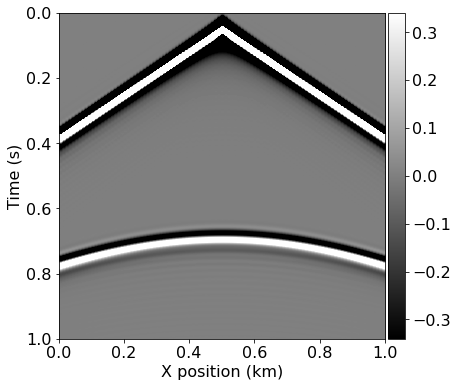

In [18]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import plot_shotrecord

plot_shotrecord(rec.data, model, 0, tn)

### Modelagem viscoacústica baseada no modelo Maxwell 


\begin{equation}
m\frac{\partial^2 u}{\partial{t^2}} - \rho \nabla \cdot \frac{1}{\rho}\nabla{u} + \frac{1}{v^2} \frac{\omega}{Q}\frac{\partial{u}}{\partial{t}} = f 
\end{equation}

Para representar o campo de onda $u$ e a velocidade $v_{p}$, precisamos de objetos simbólicos correspondentes ao campo que varia no tempo e no espaço ($u$, TimeFunction) e ao campo que varia no espaço ($v_{p}$, Function)

#### Definindo o campo u

Defina o campo de onda com o tamanho do modelo e a dimensão temporal

In [19]:
u = TimeFunction(name="u", grid=model.grid, time_order=2, space_order=space_order, 
                     staggered=NODE, save=time_range.num)

### EDP:

In [20]:
EDP_maxwell = model.m * u.dt2 - rho * div(b * grad(u, shift=.5), shift=-.5) + \
            model.m * w / model.qp * u.dt(x0=t0) + damp * u.dt

In [21]:
EDP_maxwell

(1 - damp(x, y))*Derivative(u(time, x, y), time) - (Derivative(b(x, y)*Derivative(u(time, x, y), x), x) + Derivative(b(x, y)*Derivative(u(time, x, y), y), y))/b(x, y) + Derivative(u(time, x, y), (time, 2))/vp(x, y)**2 + 0.125663706143592*Derivative(u(time, x, y), time)/(vp(x, y)**2*qp(x, y))

In [22]:
from devito import Eq, solve

st_maxwell = Eq(u.forward, solve(EDP_maxwell, u.forward))
st_maxwell

Eq(u(time + dt, x, y), ((Derivative(b(x, y)*Derivative(u(time, x, y), x), x) + Derivative(b(x, y)*Derivative(u(time, x, y), y), y))/b(x, y) - (-2.0*u(time, x, y)/dt**2 + u(time - dt, x, y)/dt**2)/vp(x, y)**2 - 1*0.125663706143592*(u(time, x, y)/dt - u(time - dt, x, y)/dt)/(vp(x, y)**2*qp(x, y)) + (1 - damp(x, y))*u(time, x, y)/dt)/((1 - damp(x, y))/dt + 1/(dt**2*vp(x, y)**2)))

### Definindo sismograma 

In [23]:
rec_maxwell = Receiver(name='rec_maxwell', grid=model.grid, npoint=101, time_range=time_range)

rec_maxwell.coordinates.data[:, 0] = np.linspace(0, model.domain_size[0], num=101)
rec_maxwell.coordinates.data[:, 1] = 20.

In [24]:
src_term = src.inject(field=u.forward, expr=src * dt**2 / model.m)

In [25]:
rec_term_maxwell = rec_maxwell.interpolate(expr=u.forward)

In [26]:
op = Operator([st_maxwell] + src_term + rec_term_maxwell, subs=model.spacing_map)

In [27]:
op(dt=model.critical_dt)

Operator `Kernel` ran in 0.09 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=0.05782099999999997, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section1', rank=None),
                     PerfEntry(time=0.01140099999999999, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section2', rank=None),
                     PerfEntry(time=0.012215999999999992, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

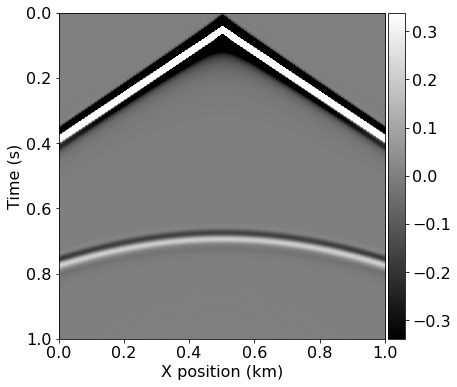

In [28]:
plot_shotrecord(rec_maxwell.data, model, 0, tn)

### Modelagem viscoacústica baseada no modelo Kelvin-Voigt

\begin{equation}
\frac{1}{v^2}\frac{\partial^2 \sigma}{\partial{t^2}} - \rho \nabla \cdot \frac{1}{\rho}\nabla{\sigma} + \frac{v^2 \rho}{\omega Q}\nabla \cdot \frac{1}{\rho}\nabla{\frac{\partial{\sigma}}{\partial{t}}} = f 
\end{equation}

Para representar o campo de onda $\sigma$ e a velocidade $v_{p}$, precisamos de objetos simbólicos correspondentes ao campo que varia no tempo e no espaço ($\sigma$, TimeFunction) e ao campo que varia no espaço ($v_{p}$, Function)

#### Definindo o campo $\sigma$

Defina o campo de onda com o tamanho do modelo e a dimensão temporal

In [29]:
sig = TimeFunction(name="sig", grid=model.grid, time_order=2, space_order=space_order, 
                     staggered=NODE, save=time_range.num)

### EDP:

In [30]:
EDP_kv = model.m * sig.dt2 - rho * div(b * grad(sig, shift=.5), shift=-.5) - \
            wq * rho * div(b * grad(sig.dt(x0=t0), shift=.5), shift=-.5) + \
            damp * sig.dt

In [31]:
EDP_kv

(1 - damp(x, y))*Derivative(sig(time, x, y), time) - (Derivative(b(x, y)*Derivative(sig(time, x, y), x), x) + Derivative(b(x, y)*Derivative(sig(time, x, y), y), y))/b(x, y) - 7.95774715459477*(Derivative(b(x, y)*Derivative(Derivative(sig(time, x, y), time), x), x) + Derivative(b(x, y)*Derivative(Derivative(sig(time, x, y), time), y), y))/(b(x, y)*qp(x, y)) + Derivative(sig(time, x, y), (time, 2))/vp(x, y)**2

In [32]:
st_kv = Eq(sig.forward, solve(EDP_kv, sig.forward))
st_kv

Eq(sig(time + dt, x, y), ((Derivative(b(x, y)*Derivative(sig(time, x, y), x), x) + Derivative(b(x, y)*Derivative(sig(time, x, y), y), y))/b(x, y) + 7.95774715459477*(Derivative(b(x, y)*Derivative(Derivative(sig(time, x, y), time), x), x) + Derivative(b(x, y)*Derivative(Derivative(sig(time, x, y), time), y), y))/(b(x, y)*qp(x, y)) - (-2.0*sig(time, x, y)/dt**2 + sig(time - dt, x, y)/dt**2)/vp(x, y)**2 + (1 - damp(x, y))*sig(time, x, y)/dt)/((1 - damp(x, y))/dt + 1/(dt**2*vp(x, y)**2)))

### Definindo sismograma 

In [33]:
rec_kv = Receiver(name='rec_kv', grid=model.grid, npoint=101, time_range=time_range)

rec_kv.coordinates.data[:, 0] = np.linspace(0, model.domain_size[0], num=101)
rec_kv.coordinates.data[:, 1] = 20.

In [34]:
src_term = src.inject(field=sig.forward, expr=src * dt**2 / model.m)

In [35]:
rec_term_kv = rec_kv.interpolate(expr=sig.forward)

In [36]:
op = Operator([st_kv] + src_term + rec_term_kv, subs=model.spacing_map)

In [37]:
op(dt=model.critical_dt)

Operator `Kernel` ran in 0.10 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=0.07389, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section1', rank=None),
                     PerfEntry(time=0.011451999999999985, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section2', rank=None),
                     PerfEntry(time=0.012241000000000002, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

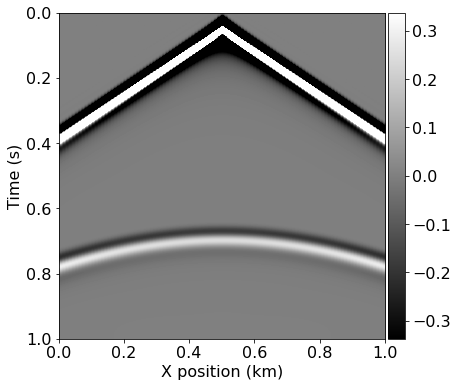

In [38]:
plot_shotrecord(rec_kv.data, model, 0, tn)

## Modelagem Viscoacústica baseada no modelo SLS

\begin{cases}
\frac{1}{v^2} \dfrac{\partial^2 W}{\partial t^2} - \left(1 + \tau\right) \rho \nabla \cdot \frac{1}{\rho}\nabla{W} + r = f, \\[10pt]
\dfrac{\partial r}{\partial t} + \dfrac{1}{\tau_{\sigma}} \left[ r - \tau \rho \nabla \cdot \frac{1}{\rho}\nabla{W} \right] = 0.
\end{cases}

Para representar os campos de ondas $W$ e $r$, e os parâmetros velocidade $v_{p}$, densidade $\rho$ e fator $Q$ precisamos de objetos simbólicos correspondentes ao campo que varia no tempo e no espaço ($W, r$, TimeFunction) e ao campo que varia no espaço ($v_{p}, \rho, Q$, Function)

### Defina os campos $W$ e $r$

In [39]:
W = TimeFunction(name="W", grid=model.grid, time_order=2, space_order=space_order, 
                     staggered=NODE, save=time_range.num)
r = TimeFunction(name="r", grid=model.grid, time_order=2, space_order=space_order, 
                     staggered=NODE)

In [40]:
# Parâmetro de relaxamento de tensão
t_s = (sp.sqrt(1.+1./qp**2)-1./qp)/f0

# Parâmetro de relaxamento de deformação
t_ep = 1./(f0**2*t_s)

# Tempo de relaxamento
tt = (t_ep/t_s)-1.

### EDP:

In [41]:
EDP_r = r.dt - (tt / t_s) * rho * div(b * grad(W, shift=.5), shift=-.5) + (1. / t_s) * r
st_r = Eq(r.forward, damp * solve(EDP_r, r.forward))

EDP_W = m * W.dt2 - rho * (1. + tt) * div(b * grad(W, shift=.5), shift=-.5) + r.forward + damp * W.dt
st_p = Eq(W.forward, solve(EDP_W, W.forward))

#### Definindo sismograma

In [42]:
rec_sls = Receiver(name='rec_sls', grid=model.grid, npoint=101, time_range=time_range)

rec_sls.coordinates.data[:, 0] = np.linspace(0, model.domain_size[0], num=101)
rec_sls.coordinates.data[:, 1] = 20.

In [43]:
src_term = src.inject(field=W.forward, expr=src * dt**2 / model.m)

In [44]:
rec_term_sls = rec_sls.interpolate(expr=W.forward)

In [45]:
op = Operator([st_r, st_p] + src_term + rec_term_sls, subs=model.spacing_map)

In [46]:
op(dt=model.critical_dt)

Operator `Kernel` ran in 0.09 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=0.000254, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section1', rank=None),
                     PerfEntry(time=0.06249500000000011, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section2', rank=None),
                     PerfEntry(time=0.011362999999999993, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section3', rank=None),
                     PerfEntry(time=0.011962999999999988, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

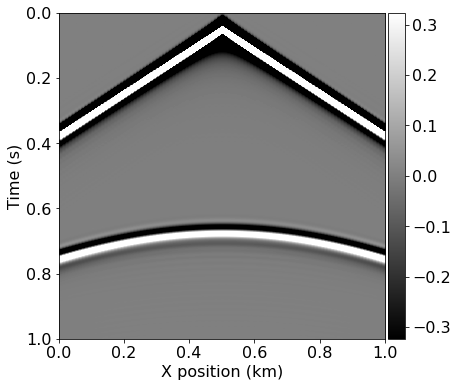

In [47]:
plot_shotrecord(rec_sls.data, model, 0, tn)

### Comparando os sismogramas

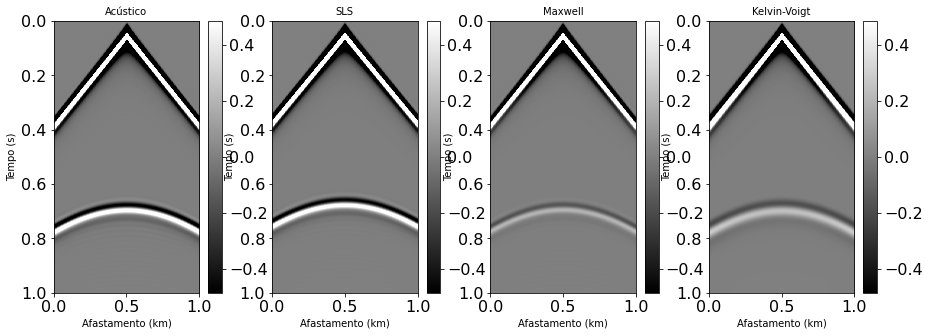

<Figure size 576x432 with 0 Axes>

In [48]:
from utils import plot_shot
plot_shot(rec.data, rec_sls.data, rec_maxwell.data, rec_kv.data, model, 0, tn, colorbar=True)

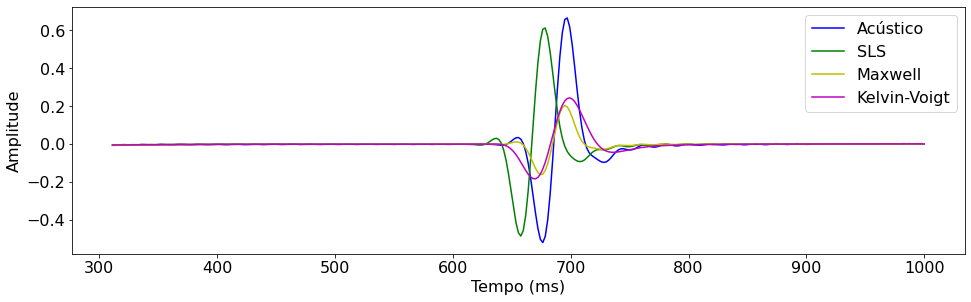

In [49]:
from utils import plot_cmp_rec_one

time = np.linspace(0, tn, rec.data.shape[0])

plot_cmp_rec_one(time[150:], rec.data[150:, 50], rec_sls.data[150:, 50], rec_maxwell.data[150:, 50], rec_kv.data[150:, 50])

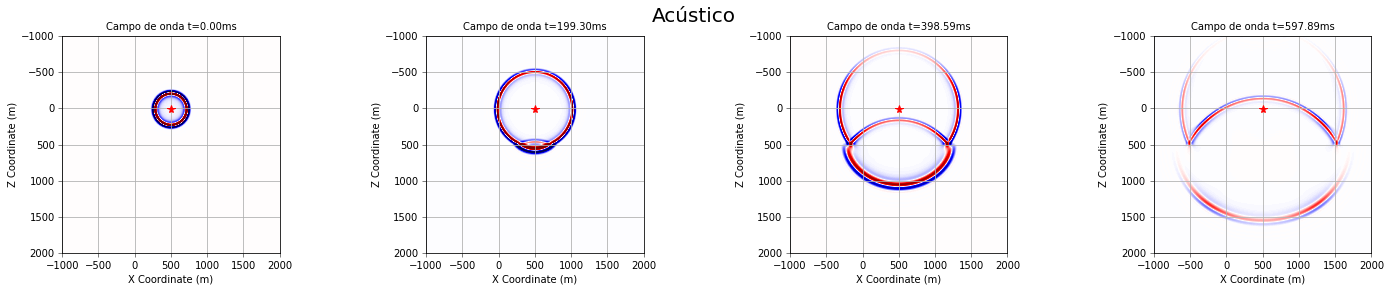

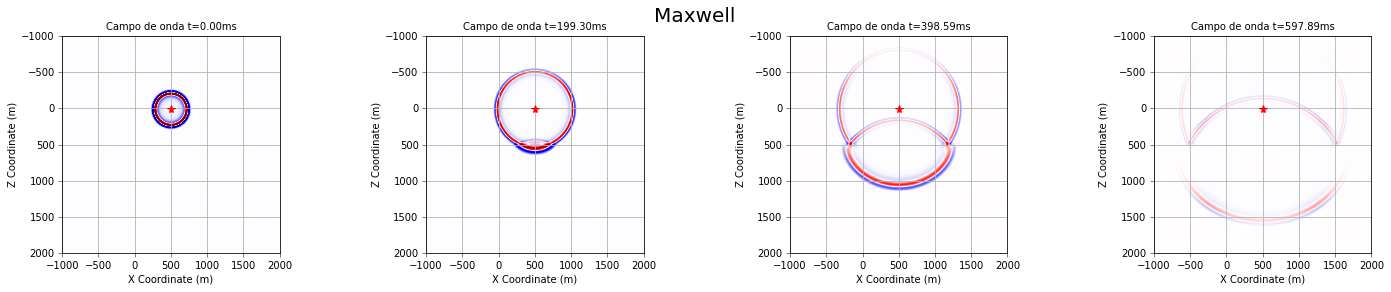

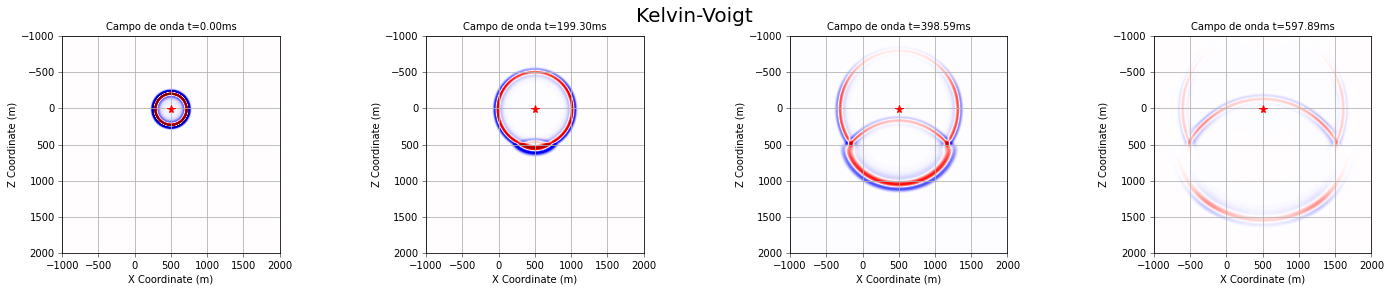

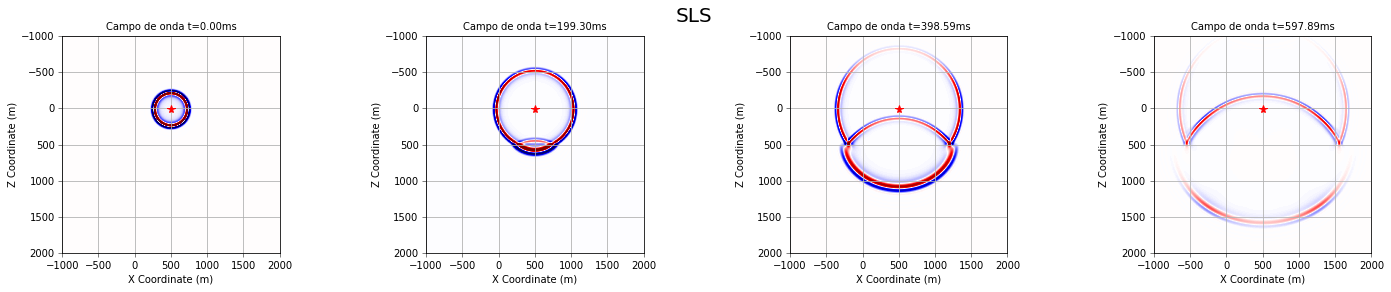

In [50]:
# NBVAL_IGNORE_OUTPUT
# Some useful definitions for plotting if nbl is set to any other value than zero
from utils import plot

amax = 0.5 * np.max(np.abs(P.data[95, :, :]))
snaps = 5
      
plot(model, P, amax, time_range, snaps, title="Acústico")
plot(model, u, amax, time_range, snaps, title="Maxwell")
plot(model, sig, amax, time_range, snaps, title="Kelvin-Voigt")
plot(model, W, amax, time_range, snaps, title="SLS")


# Modelo Chamine de gás.


Operator `initdamp` ran in 0.01 s


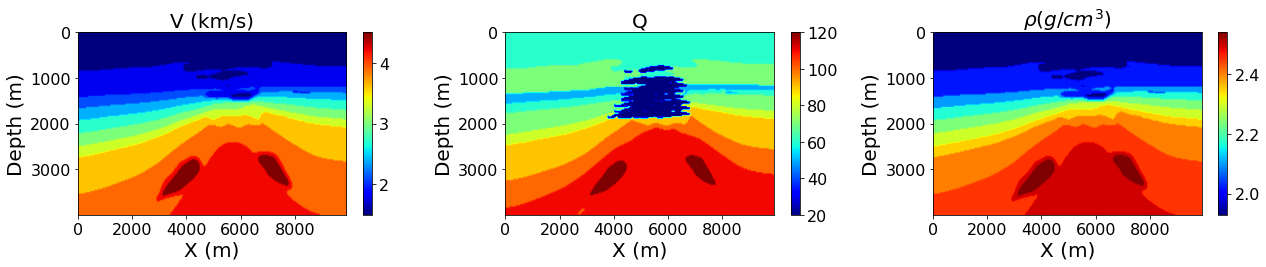

In [51]:
from examples.seismic import (AcquisitionGeometry, TimeAxis, Receiver,  ModelViscoacoustic, setup_geometry, 
                             plot_shotrecord)
from utils import V_Q_plot

nx = 400
nz = 200
shape = (nx, nz)
dtype = np.float32
spacing = (24.8125, 20.1)
origin = (0, 0)
space_order = 16
nbl = 200
pad = 40


v = np.empty(shape, dtype=dtype)
rho = np.empty(shape, dtype=dtype)
qp = np.empty(shape, dtype=dtype)


path="/scratch/projetos/q-rtm-reconcavo/chamine_de_gas/model/"
a = open(path + "V_400x200_chamine.bin", "rb")
v = np.fromfile(a, dtype=dtype, count=nx*nz).reshape([nx, nz])
v = v/1000.
a.close

c = open(path + "Q_400x200_chamine.bin", "rb")
qp = np.fromfile(c, dtype=dtype, count=nx*nz).reshape([nx, nz])
c.close()

rho[:] = 0.31*(v[:]*1000.)**0.25  # Gardner's relation


model = ModelViscoacoustic(vp=v, origin=origin, qp=qp, b=1/rho, shape=shape, spacing=spacing,
                          space_order=space_order, nbl=nbl)

V_Q_plot(model)

In [52]:
# Time step in ms and time range:
t0, tn = 0., 4000.# initial time and time propagation in ms
# because the 
dt = model.critical_dt*0.7
# dt=dt.astype(np.float32)
time_range = TimeAxis(start=t0, stop=tn, step=dt)
f0 = 0.015 # Frequência in kHz.


In [53]:
# Seismic Modelling 
from utils import modelling, kernels

# Acústico

In [54]:
rec, P = modelling(model, time_range, f0, dt, kernel="acoustic2", time_order=2)   

Operator `Kernel` ran in 1.33 s


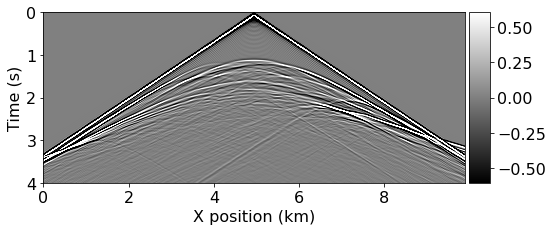

In [55]:
from utils import plot_shotrecord_utils

scale = amax = 0.015 * np.max(np.abs(P.data[45, :, :]))

plot_shotrecord_utils(rec.data, model, 0, tn, scale)

# Maxwell

In [56]:
rec_max2, u = modelling(model, time_range, f0, dt, kernel="max2", time_order=2)

Operator `Kernel` ran in 1.28 s


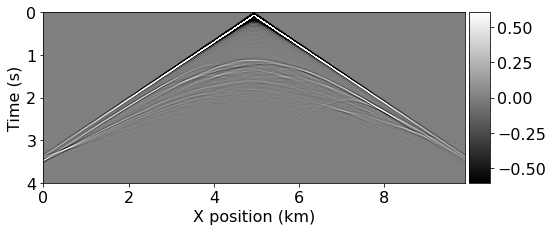

In [57]:
#plot_shotrecord(rec_max2.data, model, 0, tn)
plot_shotrecord_utils(rec_max2.data, model, 0, tn, scale)

# Kelvin-Voigt

In [58]:
rec_kv2, sig = modelling(model, time_range, f0, dt, kernel="kv2", time_order=2)

Operator `Kernel` ran in 2.56 s


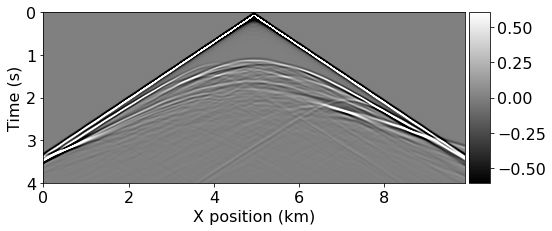

In [59]:
#plot_shotrecord(rec_kv2.data, model, 0, tn)
plot_shotrecord_utils(rec_kv2.data, model, 0, tn, scale)

# SLS

In [60]:
rec_sls2, W = modelling(model, time_range, f0, dt, kernel="sls2", time_order=2)

Operator `Kernel` ran in 1.68 s


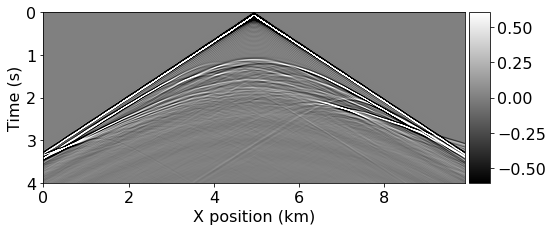

In [61]:
#plot_shotrecord(rec_sls2.data, model, 0, tn)
plot_shotrecord_utils(rec_sls2.data, model, 0, tn, scale)

# Comparativo

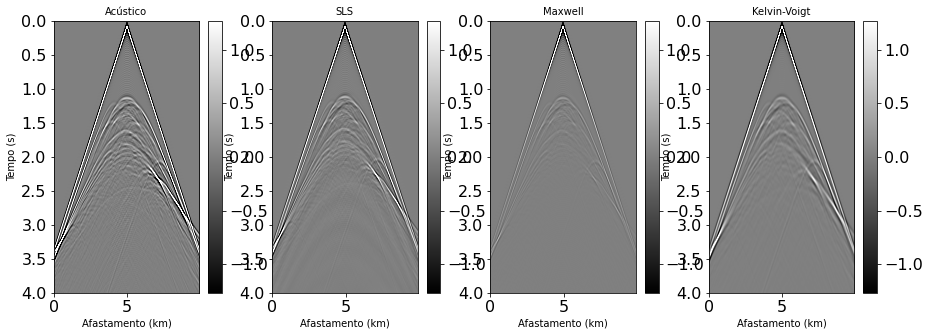

<Figure size 576x432 with 0 Axes>

In [62]:
plot_shot(rec.data, rec_sls2.data, rec_max2.data, rec_kv2.data, model, 0, tn, colorbar=True)

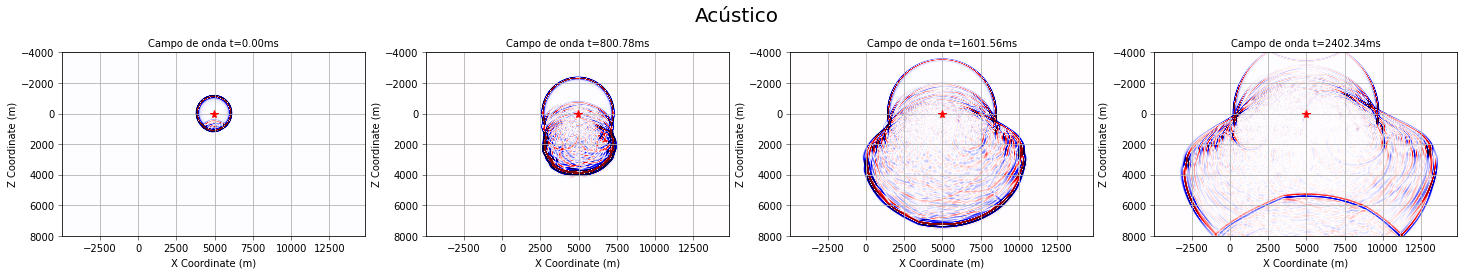

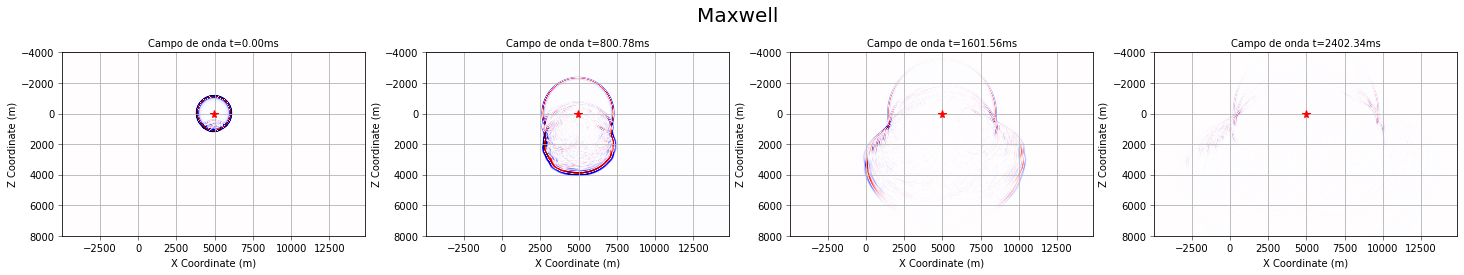

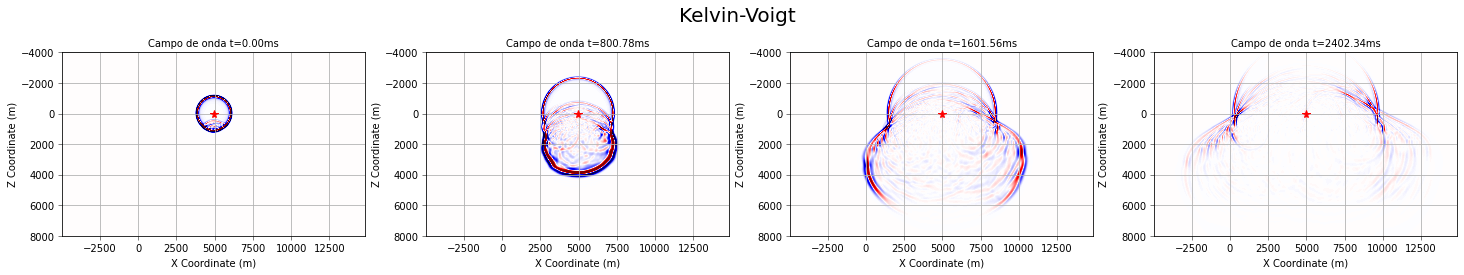

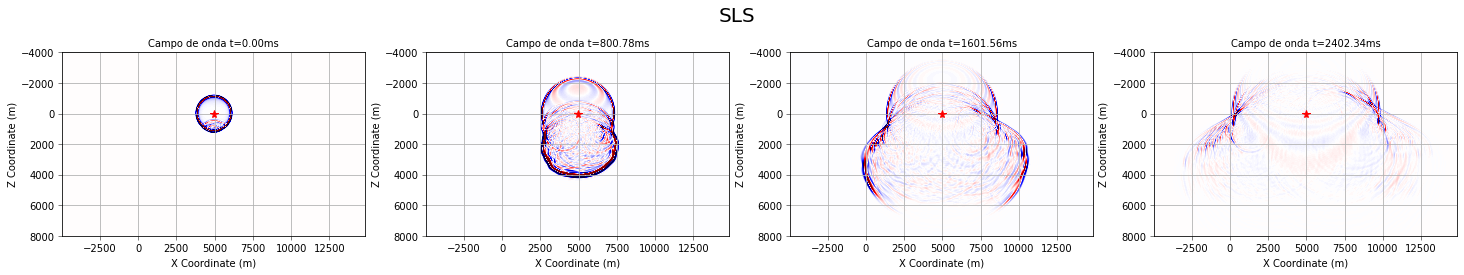

In [63]:
amax = 0.03 * np.max(np.abs(P.data[45, :, :]))
nsnaps = 5
      
plot(model, P, amax, time_range, nsnaps, title = "Acústico")
plot(model, u, amax, time_range, nsnaps, title = "Maxwell")
plot(model, sig, amax, time_range, nsnaps, title = "Kelvin-Voigt")
plot(model, W, amax, time_range, nsnaps, title = "SLS")


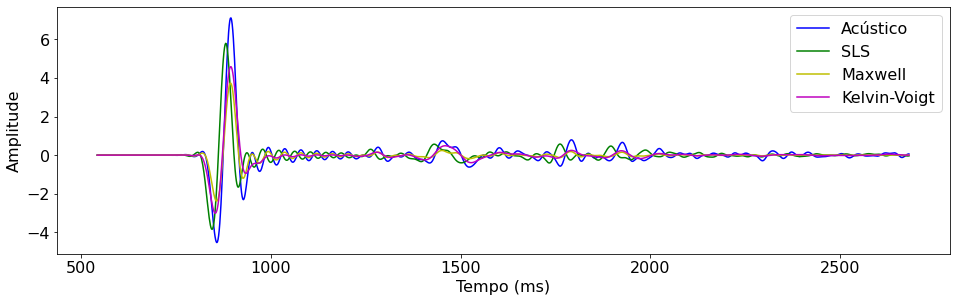

In [64]:
time = np.linspace(0, tn, rec.data.shape[0])

plot_cmp_rec_one(time[350:-850,], rec.data[350:-850, 150], rec_sls2.data[350:-850, 150], rec_max2.data[350:-850, 150], rec_kv2.data[350:-850, 150])